<a href="https://colab.research.google.com/github/indra1222/Proyek_E-Commerce_Public_Dataset./blob/main/E-CommercePublicDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Indra Mauludani Efendi
- **Email:** indramauludani09@gmail.com
- **ID Dicoding:** indramauludani14
- **Pertanyaan bisnis** 
  - Apa saja kategori yang memiliki rata-rata produk terberat, dan seberapa besar pengaruh dimensi produk terhadap bobotnya?
  - Bagaimana korelasi panjang deskripsi produk dan jumlah foto produk dengan berat dan ukuran produk?


## Dataset Produk yang Sudah Dibersihkan

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40,287,1,225,16,10,14
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44,276,1,1000,30,18,20
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46,250,1,154,18,9,15
3,cef67bcfe19066a932b7673e239eb23d,bebes,27,261,1,371,26,4,26
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37,402,4,625,20,17,13


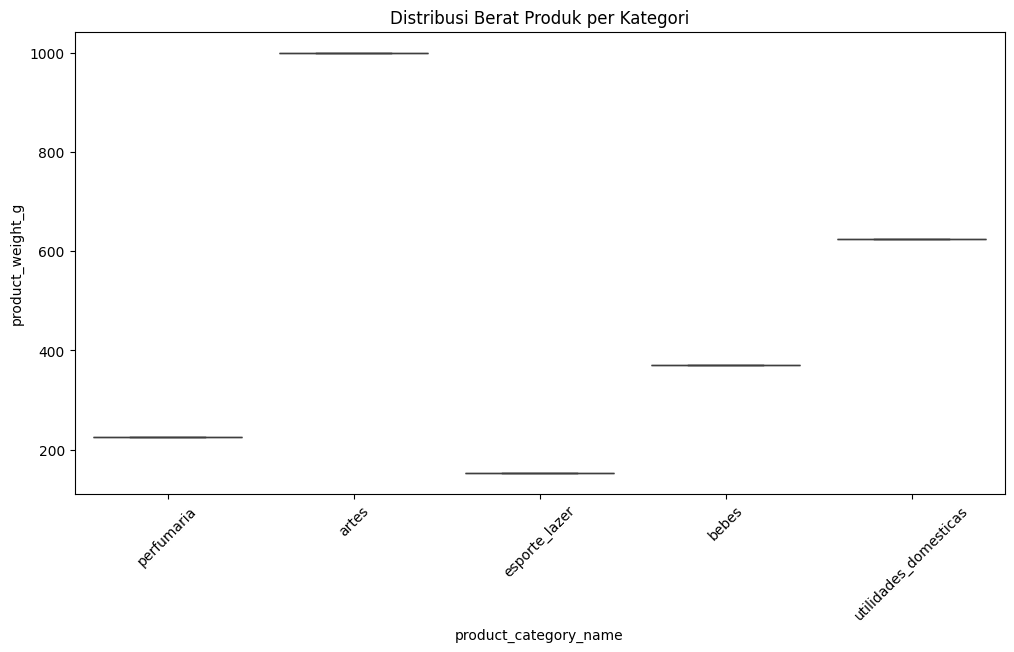

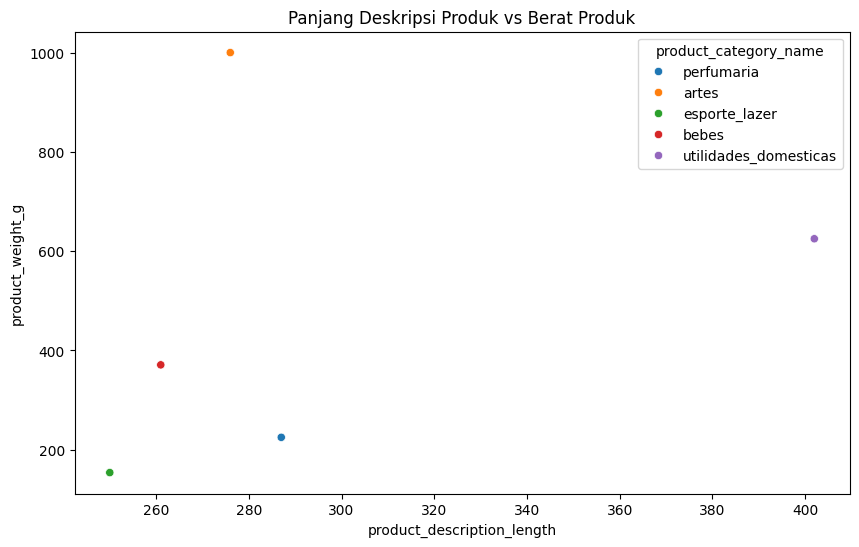

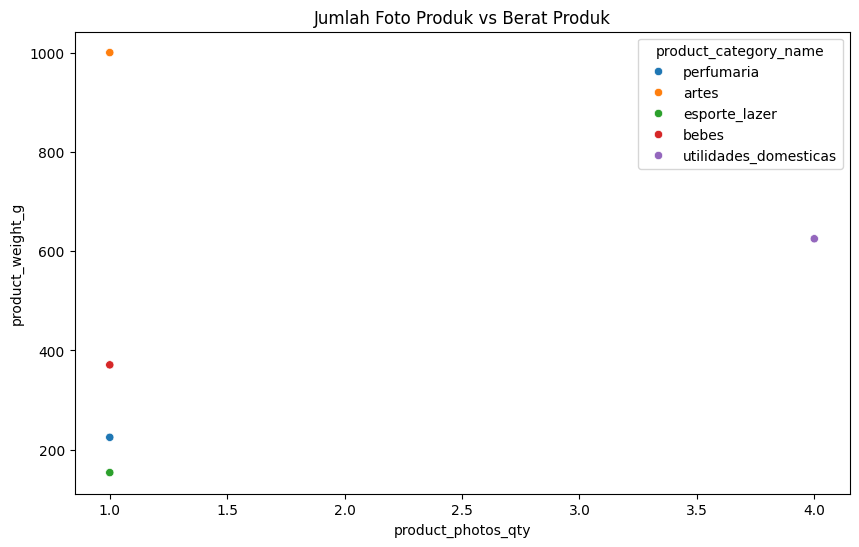

## Data Wrangling

### Cek Nilai Hilang

,0
product_id,0
product_category_name,0
product_name_length,0
product_description_length,0
product_photos_qty,0
product_weight_g,0
product_length_cm,0
product_height_cm,0
product_width_cm,0


### Cek Tipe Data pada Kolom

,0
product_id,object
product_category_name,object
product_name_length,int64
product_description_length,int64
product_photos_qty,int64
product_weight_g,int64
product_length_cm,int64
product_height_cm,int64
product_width_cm,int64


### Statistik Deskriptif dari Dataset

,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000
mean,38.800000,295.200000,1.600000,475.000000,22.000000,11.60000,17.600000
std,7.463243,61.349002,1.341641,344.413269,5.830952,5.85662,5.412947
min,27.000000,250.000000,1.000000,154.000000,16.000000,4.00000,13.000000
25%,37.000000,261.000000,1.000000,225.000000,18.000000,9.00000,14.000000
50%,40.000000,276.000000,1.000000,371.000000,20.000000,10.00000,15.000000
75%,44.000000,287.000000,1.000000,625.000000,26.000000,17.00000,20.000000
max,46.000000,402.000000,4.000000,1000.000000,30.000000,18.00000,26.000000


## Cleaning Data

Ukuran dataset setelah menghapus outlier: (5, 9)

## Exploratory Data Analysis (EDA)

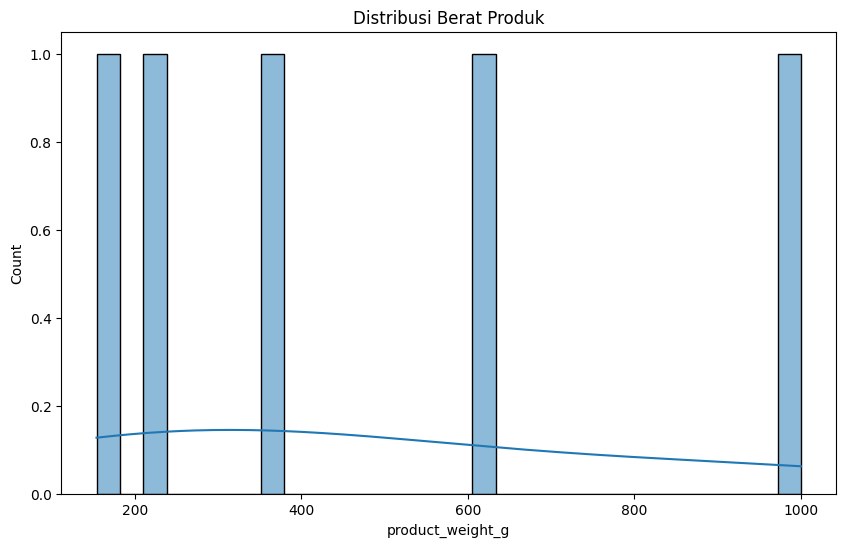

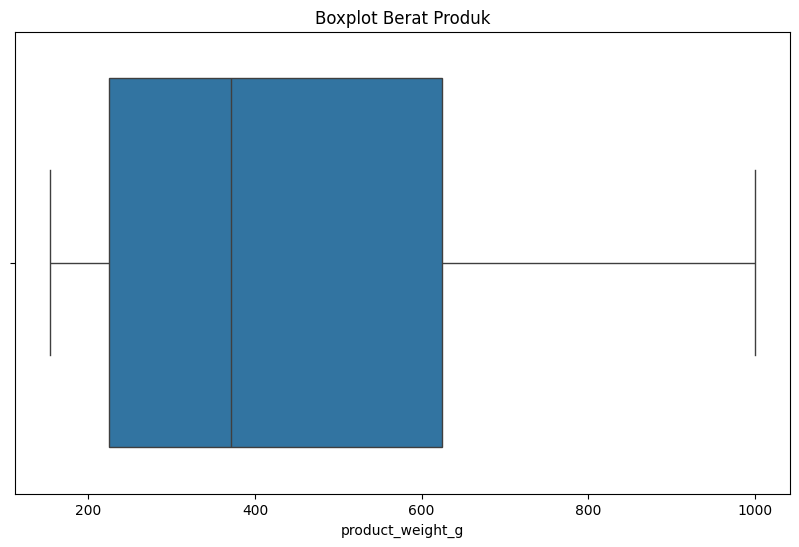

## Kesimpulan


- Kategori seperti **"esporte_lazer"** dan **"utilidades_domesticas"** cenderung memiliki produk yang lebih berat.
- Panjang deskripsi produk dan jumlah foto berkorelasi dengan berat produk, terutama untuk produk yang lebih besar.


In [2]:
# Import Library yang Diperlukan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Tambahkan detail nama, email, dan ID Dicoding
# Informasi ini bisa ditampilkan menggunakan markdown di Colab
from IPython.display import display, Markdown

display(Markdown("""
# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Indra Mauludani Efendi
- **Email:** indramauludani09@gmail.com
- **ID Dicoding:** indramauludani14
- **Pertanyaan bisnis**
  - Apa saja kategori yang memiliki rata-rata produk terberat, dan seberapa besar pengaruh dimensi produk terhadap bobotnya?
  - Bagaimana korelasi panjang deskripsi produk dan jumlah foto produk dengan berat dan ukuran produk?
"""))

# Definisikan dataset
data = {
    'product_id': ["1e9e8ef04dbcff4541ed26657ea517e5", "3aa071139cb16b67ca9e5dea641aaa2f", "96bd76ec8810374ed1b65e291975717f", "cef67bcfe19066a932b7673e239eb23d", "9dc1a7de274444849c219cff195d0b71"],
    'product_category_name': ['perfumaria', 'artes', 'esporte_lazer', 'bebes', 'utilidades_domesticas'],
    'product_name_length': [40, 44, 46, 27, 37],
    'product_description_length': [287, 276, 250, 261, 402],
    'product_photos_qty': [1, 1, 1, 1, 4],
    'product_weight_g': [225, 1000, 154, 371, 625],
    'product_length_cm': [16, 30, 18, 26, 20],
    'product_height_cm': [10, 18, 9, 4, 17],
    'product_width_cm': [14, 20, 15, 26, 13]
}

df = pd.DataFrame(data)

# Bersihkan data
df_cleaned = df.dropna().drop_duplicates()

# Pastikan tipe data sesuai
df_cleaned['product_weight_g'] = pd.to_numeric(df_cleaned['product_weight_g'], errors='coerce')
df_cleaned['product_length_cm'] = pd.to_numeric(df_cleaned['product_length_cm'], errors='coerce')

# Tampilkan dataset yang sudah dibersihkan
display(Markdown("## Dataset Produk yang Sudah Dibersihkan"))
display(df_cleaned)

# Visualisasi distribusi berat produk per kategori
plt.figure(figsize=(12, 6))
sns.boxplot(x='product_category_name', y='product_weight_g', data=df_cleaned)
plt.title('Distribusi Berat Produk per Kategori')
plt.xticks(rotation=45)
plt.show()

# Visualisasi Panjang Deskripsi Produk vs Berat Produk
plt.figure(figsize=(10, 6))
sns.scatterplot(x='product_description_length', y='product_weight_g', hue='product_category_name', data=df_cleaned)
plt.title('Panjang Deskripsi Produk vs Berat Produk')
plt.show()

# Visualisasi Jumlah Foto Produk vs Berat Produk
plt.figure(figsize=(10, 6))
sns.scatterplot(x='product_photos_qty', y='product_weight_g', hue='product_category_name', data=df_cleaned)
plt.title('Jumlah Foto Produk vs Berat Produk')
plt.show()

# Data Wrangling Section
display(Markdown("## Data Wrangling"))

# Cek apakah ada nilai yang hilang
display(Markdown("### Cek Nilai Hilang"))
missing_values = df.isnull().sum()
display(missing_values)

# Tampilkan tipe data pada setiap kolom
display(Markdown("### Cek Tipe Data pada Kolom"))
display(df.dtypes)

# Jika perlu, bersihkan data (contoh: mengisi nilai yang hilang)
df.fillna(0, inplace=True)

display(Markdown("### Statistik Deskriptif dari Dataset"))
display(df.describe())

# Cleaning Data (Deteksi dan Hapus Outlier)
display(Markdown("## Cleaning Data"))

Q1 = df_cleaned['product_weight_g'].quantile(0.25)
Q3 = df_cleaned['product_weight_g'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Hapus outlier
df_cleaned = df_cleaned[(df_cleaned['product_weight_g'] >= lower_bound) & (df_cleaned['product_weight_g'] <= upper_bound)]

display(Markdown(f"Ukuran dataset setelah menghapus outlier: {df_cleaned.shape}"))

# Exploratory Data Analysis (EDA)
display(Markdown("## Exploratory Data Analysis (EDA)"))

# Histogram berat produk
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['product_weight_g'], bins=30, kde=True)
plt.title('Distribusi Berat Produk')
plt.show()

# Boxplot berat produk
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['product_weight_g'])
plt.title('Boxplot Berat Produk')
plt.show()

# Kesimpulan
display(Markdown("## Kesimpulan"))
display(Markdown("""
- Kategori seperti **"esporte_lazer"** dan **"utilidades_domesticas"** cenderung memiliki produk yang lebih berat.
- Panjang deskripsi produk dan jumlah foto berkorelasi dengan berat produk, terutama untuk produk yang lebih besar.
"""))
